<a href="https://colab.research.google.com/github/radiaksi/yolo/blob/main/Report_Assessment_Johan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

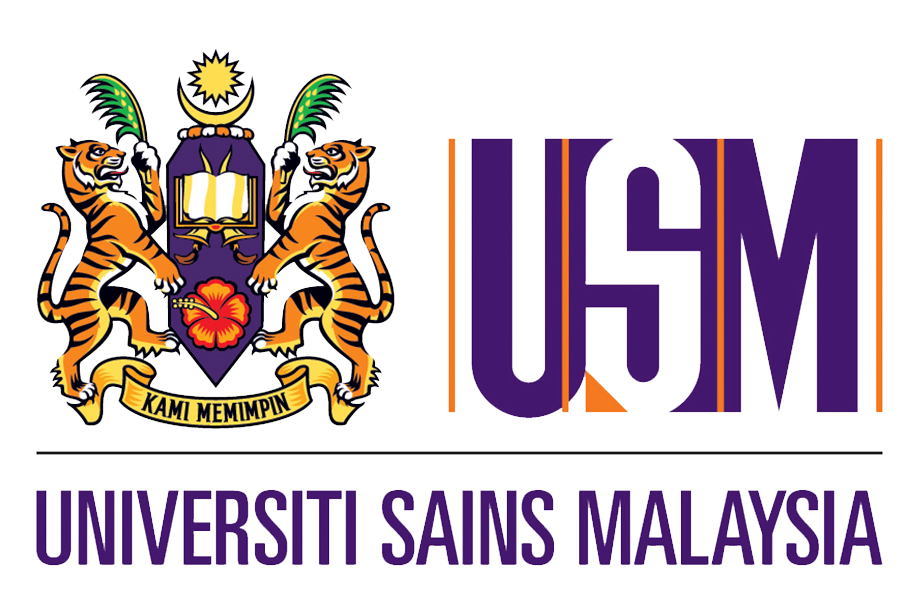

**SCHOOL OF COMPUTER SCIENCES**

**UNIVERSITI SAINS MALAYSIA**

**ACADEMIC SESSION: 2025/2026**


---


CCA101 – PROGRAMMING FUNDAMENTALS

Report-based Programming Assessment (Individual)

Hotel Review & Membership System

Name: Johan Azani bin Azizan

Matric No.: 24202278






# 1. Description of the Question Requirements

**1.1 Analysis of the Problem**  

The aim is to create a modular console-based system of TravelGo to handle hotel reviews and user membership information. The system should be able to work with two related datasets: user profiles and review records.  

Key logic includes:  
1. Calculation of the points: Each new review will provide a 100-point base.  
2. In case the review statement is more than 50 words, 10 bonus points are given.  
3. Membership Management: The users are divided into four levels depending on the number of points earned: Platinum (10,000 or more), Gold (5,000-9,999), Silver (1,000-4,999), and Basic (less than 1,000).  
6. Data Integrity: When points are updated, an automatic membership category should be updated.


**1.2 Specification of Requirements**


The program is built under strict technical constraints to demonstrate fundamental programming proficiency:


  Input: Data is loaded from users.txt and reviews.txt using tab-separated values.



  Processing: All data must be stored in parallel arrays; the use of struct, class, vectors, or pointers is strictly prohibited.



  File Handling Rules: Files can only be opened once for reading at the start and once for writing at the end to save updates.


  Output Features: The system provides a menu-driven interface for staff to view specific user/hotel reviews, system-wide summaries, leaderboards, and add new reviews during runtime.

**1.3 Pseudocode and Flowchart of the  program's design**


**1.3.1 Pseudocode**
# Global Data

    CONSTANTS:
    MAX_USER = 100
    MAX_REVIEW = 1000

    GLOBAL ARRAYS:
    User Data: UID[], username[], country[], state[], email[], membership[], points[]
    Review Data: reviewUID[], reviewStatement[], hotelName[], rating[]

    GLOBAL VARIABLES:
    numUsers = 0
    numReviews = 0

# Main

    BEGIN Main
    CALL loadData()
    WHILE True
        DISPLAY "================ HOTEL SYSTEM ================"
        DISPLAY Menu Options (1-9, A, B, 0)
        PROMPT "Selection: " -> input
        
        IF input is empty THEN CONTINUE LOOP

        choice = First character of input converted to Uppercase

        IF choice == '0' THEN
            CALL saveData()
            DISPLAY "Data saved. Exiting system..."
            BREAK LOOP
        END IF

        SWITCH choice
            CASE '1': CALL allReviewUser()
            CASE '2': CALL allReviewHotel()
            CASE '3': CALL viewUser()
            CASE '4': CALL allPositiveRating()
            CASE '5': CALL summaryActivity()
            CASE '6': CALL allUserCategory()
            CASE '7': CALL leaderboard()
            CASE '8': CALL top3Users()
            CASE '9': CALL hotelRatingSummary()
            CASE 'A': CALL addReview()
            CASE 'B': CALL searchKeywords()
            DEFAULT:  DISPLAY "Invalid selection!"
        END SWITCH
    END WHILE
    END Main
    

#Loading user data into array function

    BEGIN
    OPEN "user.txt" for Reading
    numUsers = 0
    
    IF file exists THEN
        WHILE numUsers < MAX_USER AND NOT EndOfFile
            READ line
            IF line is not empty THEN
                PARSE line by tabs into:
                UID[numUsers], username[numUsers], country[numUsers],
                state[numUsers], email[numUsers], membership[numUsers], points[numUsers]
                
                INCREMENT numUsers
            END IF
        END WHILE
        CLOSE "user.txt"
    ELSE
        DISPLAY "Error opening file..."
    END IF

    CALL loadReviews()
    END

#Loading review data into array function

    BEGIN
    OPEN "review.txt" for Reading
    numReviews = 0
    IF file does not exist THEN RETURN
    IF file does not exist THEN
        DISPLAY "Error opening file..."
    END IF

    WHILE numReviews < MAX_REVIEW AND NOT EndOfFile
        READ line
        IF line is not empty THEN
            PARSE line by tabs into:
            reviewUID[numReviews]
            rating[numReviews]
            reviewStatement[numReviews]
            hotelName[numReviews]
            
            INCREMENT numReviews
        END IF
    END WHILE
    CLOSE "review.txt"
    END

#Saving user data from array to user.txt

    BEGIN
    OPEN "user.txt" for Writing
    IF file opened successfully THEN
        FOR i = 0 to numUsers - 1
            WRITE UID[i], username[i], country[i], state[i],
                  email[i], membership[i], points[i] to file
            (Separated by tabs)
        END FOR
        CLOSE "user.txt"
    END IF
    
    CALL saveReviews()
    END

#Saving review data from array to review.txt

    BEGIN
    OPEN "review.txt" for Writing
    FOR i = 0 to numReviews - 1
        WRITE reviewUID[i], rating[i], reviewStatement[i], hotelName[i] to file
        (Separated by tabs)
    END FOR
    CLOSE "review.txt"
    END

#Word counter

    Return type INT with Parameters string s
    BEGIN
    IF s is empty THEN RETURN 0
    count = 0
    inWord = False

    FOR each character c in s
        IF c is not whitespace THEN
            IF inWord is False THEN
                INCREMENT count
                inWord = True
            END IF
        ELSE
            inWord = False
        END IF
    END FOR
    RETURN count
    END

#Updating membership

    BEGIN
    p = points[userIndex]
    IF p >= 10000 THEN membership[userIndex] = "Platinum"
    ELSE IF p >= 5000 THEN membership[userIndex] = "Gold"
    ELSE IF p >= 1000 THEN membership[userIndex] = "Silver"
    ELSE membership[userIndex] = "Basic"
    END

#**Feature Functions**

#View all reviews by a specific user

    BEGIN
    PROMPT "Enter user ID (0 to exit)" -> user
    IF user == "0" THEN RETURN

    found = False
    DISPLAY "--- Reviews by " + user + " ---"
    
    FOR i = 0 to numReviews - 1
        IF reviewUID[i] == user THEN
            DISPLAY rating[i], hotelName[i], reviewStatement[i]
            found = True
        END IF
    END FOR
    
    IF found is False THEN DISPLAY "No reviews found"
    END

#View all reviews by a specific hotel

    BEGIN
    PROMPT "Enter hotel name (0 to exit)" -> hotel
    IF hotel == "0" OR empty THEN RETURN

    found = False
    DISPLAY "--- Reviews for " + hotel + " ---"

    FOR i = 0 to numReviews - 1
        IF hotelName[i] == hotel THEN
            DISPLAY reviewUID[i], rating[i], reviewStatement[i]
            found = True
        END IF
    END FOR

    IF found is False THEN DISPLAY "No reviews found"
    END

#View details of a specific user

    BEGIN
    PROMPT "Enter user ID" -> user
    found = False
    DISPLAY Header (ID, Name, Email, Level, Points)

    FOR i = 0 to numUsers - 1
        IF UID[i] == user THEN
            DISPLAY UID[i], username[i], email[i], membership[i], points[i]
            found = True
            BREAK LOOP
        END IF
    END FOR

    IF found is False THEN DISPLAY "User ID not found"
    END

#View all positive ratings for a speicific hotel

    BEGIN
    PROMPT "Enter hotel name" -> hotel
    found = False
    DISPLAY "--- Positive Reviews (4-5 Stars) ---"

    FOR i = 0 to numReviews - 1
        IF hotelName[i] == hotel AND rating[i] >= 4 THEN
            DISPLAY rating[i], reviewStatement[i]
            found = True
        END IF
    END FOR

    IF found is False THEN DISPLAY "No positive ratings found"
    END


#View summary of all activities

    BEGIN
    totalP = Sum of all points[]
    DISPLAY "Total Registered Users: " + numUsers
    DISPLAY "Total Reviews Filed: " + numReviews
    DISPLAY "Total Points Issued: " + totalP
    END

#View all user by category

    BEGIN
    categories = {"Basic", "Silver", "Gold", "Platinum"}
    FOR each cat in categories
        DISPLAY "-- " + cat + " Members --"
        found = False
        FOR i = 0 to numUsers - 1
            IF membership[i] == cat THEN
                DISPLAY username[i] + " (" + UID[i] + ")"
                found = True
            END IF
        END FOR
        IF found is False THEN DISPLAY "(No members)"
    END FOR
    END

#View top reviewer leaderboard

    BEGIN
    // Bubble Sort based on points (Descending)
    FOR i = 0 to numUsers - 2
        FOR j = 0 to numUsers - i - 2
            IF point[j] < point[j+1] THEN
                SWAP all user data at index j and j+1
            END IF
        END FOR
    END FOR

    DISPLAY "--- POINTS LEADERBOARD ---"
    FOR i = 0 to numUsers - 1
        DISPLAY i+1, username[i], membership[i], point[i]
    END FOR
    END

#View top 3 users based on points

    BEGIN
    IF numUsers == 0 THEN RETURN

    // Create temp arrays to store counts without modifying main arrays
    Initialize tempID[], tempName[] with original data
    Initialize reviewCount[] to 0

    // Count reviews per user
    FOR i = 0 to numUsers - 1
        FOR r = 0 to numReviews - 1
            IF reviewUID[r] == UID[i] THEN
                INCREMENT reviewCount[i]
            END IF
        END FOR
    END FOR

    // Sort temp arrays based on reviewCount (Descending)
    FOR i = 0 to numUsers - 2
        FOR j = 0 to numUsers - i - 2
            IF reviewCount[j] < reviewCount[j+1] THEN
                SWAP reviewCount[j], reviewCount[j+1]
                SWAP tempID[j], tempID[j+1]
                SWAP tempName[j], tempName[j+1]
            END IF
        END FOR
    END FOR

    DISPLAY "--- TOP 3 REVIEWERS ---"
    FOR i = 0 to 2
        IF i < numUsers THEN
            DISPLAY i+1, tempName[i], reviewCount[i]
        END IF
    END FOR
    END
    
#View summary of hotel ratings

    BEGIN
    Initialize uniqueHotels[], reviewCounts[], totalRatings[]
    uniqueCount = 0

    // 1. Identify unique hotels and aggregate ratings
    FOR i = 0 to numReviews - 1
        currentHotel = hotelName[i]
        hotelIndex = -1
        
        // Check if hotel exists in uniqueHotels list
        FOR j = 0 to uniqueCount - 1
            IF uniqueHotels[j] == currentHotel THEN
                hotelIndex = j
                BREAK
            END IF
        END FOR

        IF hotelIndex == -1 THEN
            // Add new hotel to list
            uniqueHotels[uniqueCount] = currentHotel
            hotelIndex = uniqueCount
            INCREMENT uniqueCount
        END IF

        INCREMENT reviewCounts[hotelIndex]
        totalRatings[hotelIndex] += rating[i]
    END FOR

    // 2. Sort unique hotels by review count (Popularity)
    FOR i = 0 to uniqueCount - 2
        FOR j = 0 to uniqueCount - i - 2
            IF reviewCounts[j] < reviewCounts[j+1] THEN
                SWAP reviewCounts, uniqueHotels, totalRatings at j and j+1
            END IF
        END FOR
    END FOR

    // 3. Display
    DISPLAY "--- HOTEL RATING SUMMARY ---"
    FOR i = 0 to uniqueCount - 1
        average = totalRatings[i] / reviewCounts[i]
        DISPLAY uniqueHotels[i], reviewCounts[i], average
    END FOR
    END

#Keywords Searcher

    BEGIN
    PROMPT "Enter keyword" -> keyword
    found = False
    
    FOR i = 0 to numReviews - 1
        text = reviewStatement[i]
        IF keyword is found inside text (Case Insensitive Substring Search) THEN
            DISPLAY hotelName[i], reviewStatement[i], rating[i]
            found = True
        END IF
    END FOR

    IF found is False THEN DISPLAY "No reviews found"
    END

#Add a review

    BEGIN
    IF numReviews >= MAX_REVIEW THEN
        DISPLAY "System capacity full"
        RETURN
    END IF

    // Validate User
    REPEAT
        PROMPT "Enter User ID (0 to cancel)" -> inputUID
        IF inputUID == "0" THEN RETURN
        
        Find inputUID in UID[] array
        IF Found THEN
            Set userIndex
            BREAK LOOP
        ELSE
            DISPLAY "User ID not found"
        END IF
    UNTIL Valid User

    reviewUID[numReviews] = inputUID

    // Validate Rating
    REPEAT
        PROMPT "Enter Rating (1-5)" -> r
    UNTIL r is between 1 AND 5
    rating[numReviews] = r

    PROMPT "Review Statement" -> reviewStatement[numReviews]
    PROMPT "Hotel Name" -> hotelName[numReviews]

    // Calculate Points
    pointsEarned = 100
    IF CALL countWords(reviewStatement[numReviews]) > 50 THEN
        pointsEarned = pointsEarned + 10
        DISPLAY "Bonus points added!"
    END IF

    // Update User Data
    point[userIndex] += pointsEarned
    
    oldMem = membership[userIndex]
    CALL updateMembership(userIndex)
    
    IF membership[userIndex] != oldMem THEN
        DISPLAY "Membership Upgraded!"
    END IF

    INCREMENT numReviews
    DISPLAY "Review added successfully"
    END

**1.3.2 Flowchart**

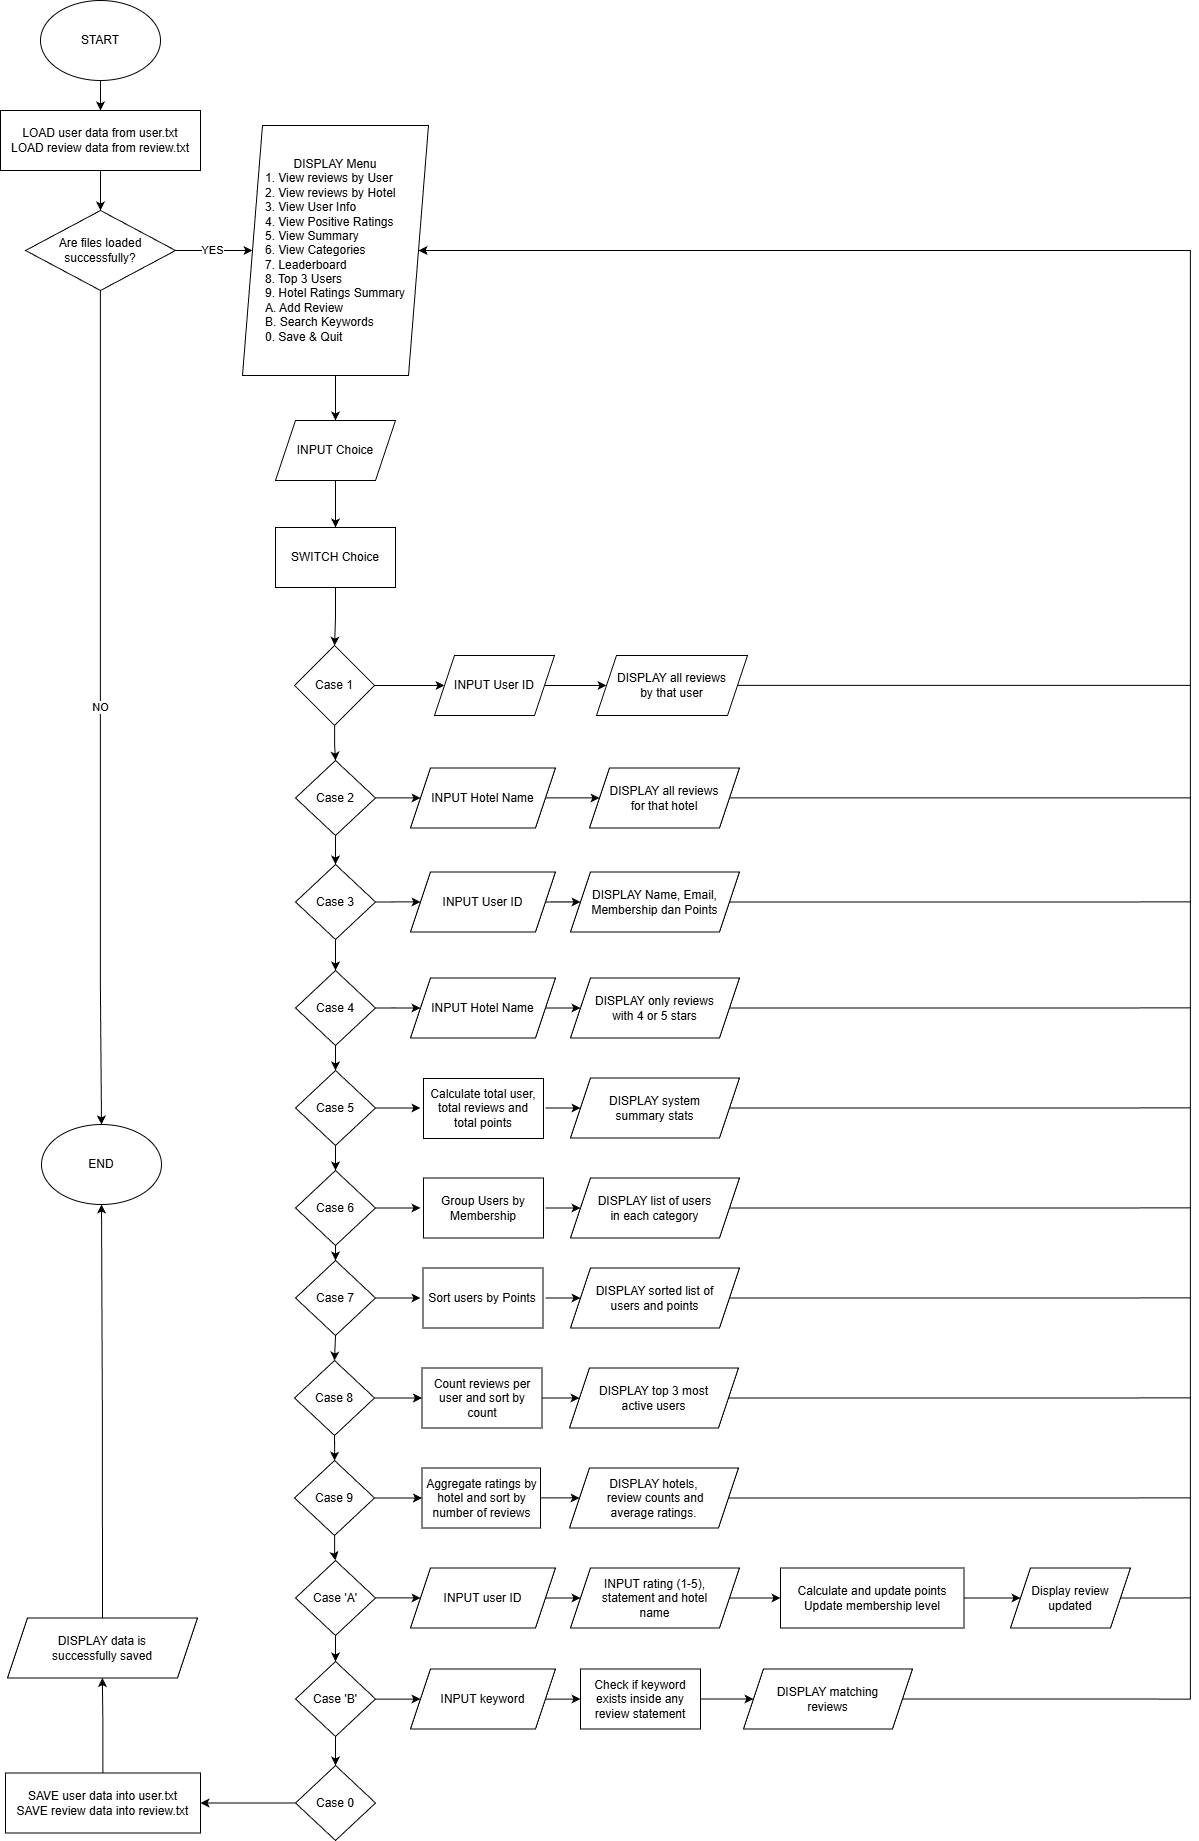

#**1.4 Inputs, Outputs, Process, Constraints, and Assumptions**

    1. INPUTS (Data In) The system accepts data from two main sources: external text files and real-time user input.

          External Files:

              user.txt: Contains existing user records including User ID, Name, Country, State, Email, Membership Level, and Points.

              review.txt: Contains past review data including User ID, Rating, Review Statement, and Hotel Name.

          User Entry (Keyboard):

              Menu Selection: Single characters (1-9, A, B, 0) to navigate the system.

              User ID: Unique identifiers used for logging in or searching.

              Hotel Name: String input to identify specific hotels.

              Rating: Integer values between 1 and 5.

              Review Statement: A text string describing the user's experience.

              Search Keywords: Specific terms (e.g., "clean", "wifi") used to filter reviews.

    2. PROCESS (Operations) The system performs several key logical operations to manage the hotel data:

          File Handling: The system reads data from text files into parallel arrays upon startup and writes all current array data back to the text files upon a successful exit.

          Validation: The system checks if User IDs exist before allowing a review to be added and ensures ratings are strictly between 1 and 5.

          Search Algorithms: The system performs linear searches to find specific User IDs or to find substrings (keywords) within review statements.

          Mathematical Calculations: The system calculates the total points for the system summary and averages the star ratings for the hotel popularity report.

          Sorting: The system uses the Bubble Sort algorithm to rearrange users by points (Leaderboard) and to rank hotels by the number of reviews (Popularity).

          Data Updates: The system automatically adds 100 points (plus a 10-point bonus for long reviews) to a user's account and instantly recalculates their membership tier (Basic, Silver, Gold, Platinum).

    3. OUTPUTS (Information Out) The system produces information for the user on the screen and updates the permanent storage.

          Screen Displays:

              Main Menu options.

              Lists of reviews filtered by specific User IDs or Hotel Names.

              User Profile details showing current points and membership status.

              A filtered list showing only positive reviews (4 or 5 stars).

              Statistical summaries showing total users, reviews, and points issued.

              A leaderboard displaying the top users sorted by loyalty points.

              Feedback messages (e.g., "Review added successfully," "Invalid selection," or "Membership upgraded").

          File Updates:

              The user.txt file is overwritten with the latest point balances and membership levels.

              The review.txt file is appended with all new reviews added during the session.

    4. CONSTRAINTS (Limitations) These are the hard limits encoded into the program:

          Memory Capacity: The system is limited to a maximum of 100 users and 1000 reviews because the arrays have a fixed size defined in the code constants.

          Data Volatility: New data is held in temporary memory (RAM) while the program is running. If the program crashes or is closed without selecting "0" (Save & Quit), all new data is lost.

          Single User: The system is designed for a single administrator; it cannot handle multiple people adding reviews at the exact same time.

    5. ASSUMPTIONS The program operates correctly assuming the following conditions are true:

          File Formatting: It is assumed that the input text files (user.txt and review.txt) are formatted correctly with tabs separating the data columns. A corrupted file may cause the program to crash or load incorrect data.

          English Language: It is assumed that reviews are written in English. While the search function works on any text, the logic assumes keywords like "clean" are meaningful to the user.

          Valid Inputs: It is assumed that users will eventually provide valid numbers for ratings. While there is basic error checking, the system assumes the input stream will not be corrupted by non-numeric characters when a number is expected.

#**2. Code**

In [9]:
%%writefile hotel.cpp

#include <iostream>
#include <fstream>
#include <string>
#include <iomanip>

using namespace std;

// constant
const int maxUser = 100;
const int maxReview = 1000;

// array declaration (parallel arrays)
string UID[maxUser], username[maxUser], country[maxUser], state[maxUser], email[maxUser], membership[maxUser];
int point[maxUser];
int numUsers = 0;

string reviewUID[maxReview], reviewStatement[maxReview], hotelName[maxReview];
int rating[maxReview];
int numReviews = 0;

// function prototypes
void loadData();
void saveData();
void loadReviews();
void saveReviews();
void allReviewUser();
void allReviewHotel();
void viewUser();
void allPositiveRating();
void summaryActivity();
void allUserCategory();
void leaderboard();
void top3Users();
void hotelRatingSummary();
void searchKeywords();
void addReview();
int countWords(string s);
void updateMembership(int userIndex);

// main function
int main() {
    loadData(); // load files at start

    string input;
    char choice;

    while (true) {
        cout << "\n================ HOTEL SYSTEM ================" << endl;
        cout << "1. View all reviews by user" << endl;
        cout << "2. View all reviews by hotel" << endl;
        cout << "3. View user information" << endl;
        cout << "4. View positive ratings (4-5 stars) for a hotel" << endl;
        cout << "5. View summary of activities" << endl;
        cout << "6. View users by membership category" << endl;
        cout << "7. View Points Leaderboard (Sorted)" << endl;
        cout << "8. View Top 3 Most Active Reviewers" << endl;
        cout << "9. View Hotel Rating Summary (Sorted by Popularity)" << endl;
        cout << "A. Add a new review" << endl;
        cout << "B. Search Reviews by Keyword" << endl;
        cout << "0. Save & Quit" << endl;
        cout << "\n   Selection: ";

        getline(cin, input);
        if (input.empty()) continue;

        choice = toupper(input[0]);

        if (choice == '0') {
            saveData(); // save files at end
            cout << "   Data saved. Exiting system..." << endl;
            break;
        }

        switch (choice) {
            case '1': allReviewUser(); break;
            case '2': allReviewHotel(); break;
            case '3': viewUser(); break;
            case '4': allPositiveRating(); break;
            case '5': summaryActivity(); break;
            case '6': allUserCategory(); break;
            case '7': leaderboard(); break;
            case '8': top3Users(); break;
            case '9': hotelRatingSummary(); break;
            case 'A': addReview(); break;
            case 'B': searchKeywords(); break;
            default:
                cout << "   Invalid selection!" << endl;
                break;
        }
    }
    return 0;
}

// function definitions

void loadReviews() {
    ifstream inFile("review.txt");
    numReviews = 0;
    if (inFile.fail()) return;

    while (numReviews < maxReview && !inFile.eof()) {
        getline(inFile, reviewUID[numReviews], '\t');
        if (reviewUID[numReviews].empty()) break;

        inFile >> rating[numReviews];
        inFile.ignore(1, '\t'); // skip exactly one tab

        getline(inFile, reviewStatement[numReviews], '\t');
        getline(inFile, hotelName[numReviews]);

        numReviews++;
    }
    inFile.close();
}

void loadData() {
    ifstream inFile("user.txt");
    numUsers = 0;
    if (inFile.fail()) {
        cout << "   Error opening file." << endl;
    } else {
        while (numUsers < maxUser && !inFile.eof()) {
            getline(inFile, UID[numUsers], '\t');
            if (UID[numUsers].empty()) break;

            getline(inFile, username[numUsers], '\t');
            getline(inFile, country[numUsers], '\t');
            getline(inFile, state[numUsers], '\t');
            getline(inFile, email[numUsers], '\t');
            getline(inFile, membership[numUsers], '\t');

            // auto-convert text to integer points
            inFile >> point[numUsers];
            inFile.ignore(1000, '\n');

            numUsers++;
        }
        inFile.close();
    }
    loadReviews();
}

void saveReviews() {
    ofstream outFile("review.txt");
    for (int i = 0; i < numReviews; i++) {
        outFile << reviewUID[i] << "\t" << rating[i] << "\t"
                << reviewStatement[i] << "\t" << hotelName[i] << endl;
    }
    outFile.close();
}

void saveData() {
    ofstream outFile("user.txt");
    if (!outFile.fail()) {
        for (int i = 0; i < numUsers; i++) {
            outFile << UID[i] << "\t" << username[i] << "\t" << country[i] << "\t"
                    << state[i] << "\t" << email[i] << "\t" << membership[i] << "\t"
                    << point[i] << endl;
        }
        outFile.close();
    }
    saveReviews();
}

int countWords(string s) {
    if (s.empty()) return 0;
    int count = 0;
    bool inWord = false;
    for (size_t i = 0; i < s.length(); i++) {
        if (s[i] != ' ' && s[i] != '\t' && s[i] != '\n' && s[i] != '\r') {
            if (!inWord) {
                count++;
                inWord = true;
            }
        } else {
            inWord = false;
        }
    }
    return count;
}

void updateMembership(int i) {
    if (point[i] >= 10000) membership[i] = "Platinum";
    else if (point[i] >= 5000) membership[i] = "Gold";
    else if (point[i] >= 1000) membership[i] = "Silver";
    else membership[i] = "Basic";
}

void allReviewUser() {
    string user;
    cout << "   Enter user ID (0 to exit): ";
    cin >> user;
    cin.ignore(10000, '\n');
    if (user == "0") return;

    bool found = false;
    cout << "   --- Reviews by " << user << " ---" << endl;
    for (int i = 0; i < numReviews; i++) {
        if (reviewUID[i] == user) {
            cout << "   [" << rating[i] << "*] " << hotelName[i] << ": " << reviewStatement[i] << endl;
            found = true;
        }
    }
    if (!found) cout << "   No reviews found for User ID: " << user << endl;
}

void allReviewHotel() {
    string hotel;
    cout << "   Enter hotel name (0 to exit): ";
    getline(cin, hotel);
    if (hotel == "0" || hotel == "") return;

    bool found = false;
    cout << "   --- Reviews for " << hotel << " ---" << endl;
    for (int i = 0; i < numReviews; i++) {
        if (hotelName[i] == hotel) {
            cout << "   User " << reviewUID[i] << " (" << rating[i] << "*): " << reviewStatement[i] << endl;
            found = true;
        }
    }
    if (!found) cout << "   No reviews found for hotel: " << hotel << endl;
}

void viewUser() {
    string user;
    cout << "   Enter user ID: ";
    cin >> user;
    cin.ignore(10000, '\n');

    bool found = false;
    cout << left << setw(8) << "ID" << setw(25) << "Name" << setw(30) << "Email" << setw(12) << "Level" << "Points" << endl;
    cout << "-------------------------------------------------------------------------------------" << endl;

    for (int i = 0; i < numUsers; i++) {
        if (UID[i] == user) {
            cout << left << setw(8) << UID[i] << setw(25) << username[i] << setw(30) << email[i]
                 << setw(12) << membership[i] << point[i] << endl;
            found = true;
            break;
        }
    }
    if(!found) cout << "   Error: User ID '" << user << "' not found." << endl;
}

void allPositiveRating() {
    string hotel;
    cout << "   Enter hotel name to see positive reviews: ";
    getline(cin, hotel);

    bool found = false;
    cout << "   --- Positive Reviews (4-5 Stars) for " << hotel << " ---" << endl;
    for (int i = 0; i < numReviews; i++) {
        if (hotelName[i] == hotel && rating[i] >= 4) {
            cout << "   (" << rating[i] << "*) " << reviewStatement[i] << endl;
            found = true;
        }
    }
    if (!found) cout << "   No positive ratings found for this hotel." << endl;
}

void summaryActivity() {
    long long totalP = 0;
    for (int i = 0; i < numUsers; i++) totalP += point[i];
    cout << "   --- SYSTEM SUMMARY ---" << endl;
    cout << "   Total Registered Users: " << numUsers << endl;
    cout << "   Total Reviews Filed    : " << numReviews << endl;
    cout << "   Total Points Issued    : " << totalP << endl;
}

void allUserCategory() {
    string cats[] = {"Basic", "Silver", "Gold", "Platinum"};
    for (int i = 0; i < 4; i++) {
        cout << "-- " << cats[i] << " Members --" << endl;
        bool found = false;
        for (int j = 0; j < numUsers; j++) {
            if (membership[j] == cats[i]) {
                cout << "   " << username[j] << " (" << UID[j] << ")" << endl;
                found = true;
            }
        }
        if (!found) cout << "   (No members)" << endl;
        cout << endl;
    }
}

void leaderboard() {
    for (int i = 0; i < numUsers - 1; i++) {
        for (int j = 0; j < numUsers - i - 1; j++) {
            if (point[j] < point[j + 1]) {
                int tP = point[j]; point[j] = point[j+1]; point[j+1] = tP;
                string tU = UID[j]; UID[j] = UID[j+1]; UID[j+1] = tU;
                string tN = username[j]; username[j] = username[j+1]; username[j+1] = tN;
                string tC = country[j]; country[j] = country[j+1]; country[j+1] = tC;
                string tS = state[j]; state[j] = state[j+1]; state[j+1] = tS;
                string tE = email[j]; email[j] = email[j+1]; email[j+1] = tE;
                string tM = membership[j]; membership[j] = membership[j+1]; membership[j+1] = tM;
            }
        }
    }
    cout << "   --- POINTS LEADERBOARD ---" << endl;
    cout << left << setw(5) << "No." << setw(20) << "Name" << setw(15) << "Category" << "Points" << endl;
    cout << "--------------------------------------------------------" << endl;
    for (int i = 0; i < numUsers; i++) {
        cout << left << setw(5) << i+1 << setw(20) << username[i] << setw(15) << membership[i] << point[i] << endl;
    }
}

void top3Users() {
    if (numUsers == 0) return;
    string tempName[maxUser];
    int reviewCount[maxUser] = {0};

    for(int i=0; i<numUsers; i++) {
        tempName[i] = username[i];
        for(int r=0; r<numReviews; r++) {
            if(reviewUID[r] == UID[i]) reviewCount[i]++;
        }
    }

    for (int i = 0; i < numUsers - 1; i++) {
        for (int j = 0; j < numUsers - i - 1; j++) {
            if (reviewCount[j] < reviewCount[j + 1]) {
                int tc = reviewCount[j]; reviewCount[j] = reviewCount[j+1]; reviewCount[j+1] = tc;
                string tn = tempName[j]; tempName[j] = tempName[j+1]; tempName[j+1] = tn;
            }
        }
    }
    cout << "   --- TOP 3 REVIEWERS ---" << endl;
    for(int i=0; i<3 && i<numUsers; i++) {
        cout << "   " << i+1 << ". " << tempName[i] << " - " << reviewCount[i] << " reviews" << endl;
    }
}

void searchKeywords() {
    string keyword;
    cout << "   Enter keyword to search (e.g., clean, wifi): ";
    cin >> keyword;
    cin.ignore(10000, '\n');

    bool found = false;
    cout << "   --- Search Results for '" << keyword << "' ---" << endl;
    int kLen = keyword.length();

    for (int i = 0; i < numReviews; i++) {
        string text = reviewStatement[i];
        int tLen = text.length();
        bool matchInReview = false;

        if (kLen <= tLen) {
            for (int j = 0; j <= tLen - kLen; j++) {
                bool match = true;
                for (int k = 0; k < kLen; k++) {
                    if (tolower(text[j + k]) != tolower(keyword[k])) {
                        match = false;
                        break;
                    }
                }
                if (match) { matchInReview = true; break; }
            }
        }
        if (matchInReview) {
            cout << "   [" << hotelName[i] << "] " << reviewStatement[i] << " (" << rating[i] << "*)" << endl;
            found = true;
        }
    }
    if (!found) cout << "   No reviews found containing '" << keyword << "'." << endl;
}

void hotelRatingSummary() {
    string uniqueHotels[maxReview];
    int reviewCounts[maxReview] = {0};
    double totalRatings[maxReview] = {0.0};
    int uniqueCount = 0;

    for(int i=0; i<numReviews; i++) {
        int hotelIndex = -1;
        for(int j=0; j<uniqueCount; j++) {
            if(uniqueHotels[j] == hotelName[i]) { hotelIndex = j; break; }
        }
        if(hotelIndex == -1) {
            uniqueHotels[uniqueCount] = hotelName[i]; hotelIndex = uniqueCount; uniqueCount++;
        }
        reviewCounts[hotelIndex]++;
        totalRatings[hotelIndex] += rating[i];
    }

    for (int i = 0; i < uniqueCount - 1; i++) {
        for (int j = 0; j < uniqueCount - i - 1; j++) {
            if (reviewCounts[j] < reviewCounts[j + 1]) {
                int tc = reviewCounts[j]; reviewCounts[j] = reviewCounts[j+1]; reviewCounts[j+1] = tc;
                string th = uniqueHotels[j]; uniqueHotels[j] = uniqueHotels[j+1]; uniqueHotels[j+1] = th;
                double tr = totalRatings[j]; totalRatings[j] = totalRatings[j+1]; totalRatings[j+1] = tr;
            }
        }
    }

    cout << "   --- HOTEL RATING SUMMARY (Sorted by Popularity) ---" << endl;
    cout << left << setw(30) << "Hotel Name" << setw(10) << "Reviews" << "Avg Rating" << endl;
    cout << "--------------------------------------------------------" << endl;
    for(int i=0; i<uniqueCount; i++) {
        double avg = (reviewCounts[i] > 0) ? (totalRatings[i] / (double)reviewCounts[i]) : 0.0;
        cout << left << setw(30) << uniqueHotels[i] << setw(10) << reviewCounts[i] << fixed << setprecision(1) << avg << endl;
    }
}

void addReview() {
    if (numReviews >= maxReview) {
        cout << "   Error: System review capacity full." << endl;
        return;
    }

    string inputUID;
    int userIndex = -1;
    while (userIndex == -1) {
        cout << "   Enter User ID (or '0' to cancel): ";
        cin >> inputUID; cin.ignore(10000, '\n');
        if (inputUID == "0") return;

        for (int i = 0; i < numUsers; i++) {
            if (UID[i] == inputUID) { userIndex = i; break; }
        }
        if (userIndex == -1) cout << "   Error: User ID not found." << endl;
    }

    reviewUID[numReviews] = inputUID;
    int r;
    while (true) {
        cout << "   Enter Rating (1-5): ";
        if (cin >> r && r >= 1 && r <= 5) break;
        cout << "   Invalid input. Please enter 1-5." << endl;
        cin.clear(); cin.ignore(10000, '\n');
    }
    rating[numReviews] = r; cin.ignore(10000, '\n');

    cout << "   Enter Review Statement: ";
    getline(cin, reviewStatement[numReviews]);
    cout << "   Enter Hotel Name: ";
    getline(cin, hotelName[numReviews]);

    // points calculation rules
    int pointsEarned = 100;
    if (countWords(reviewStatement[numReviews]) > 50) {
        pointsEarned += 10;
        cout << "   (Bonus 10 points for detailed review!)" << endl;
    }

    point[userIndex] += pointsEarned;
    cout << "   Points Updated: " << pointsEarned << " added." << endl;

    string oldMem = membership[userIndex];
    updateMembership(userIndex); // automatic membership calculation
    if(membership[userIndex] != oldMem) {
        cout << "   CONGRATULATIONS! Membership upgraded to " << membership[userIndex] << "!" << endl;
    }

    numReviews++;
    cout << "\n   Review added successfully (Save on Exit)." << endl;
}

Overwriting hotel.cpp


#Input files being used

In [6]:
%%writefile user.txt

U001	Siti Nurhaliza	Malaysia	Kelantan	sitinurhaliza@gmail.com	Gold	5935
U002	M. Nasir	Malaysia	Sarawak	mnasir@gmail.com	Gold	9024
U003	Sheila Majid	Malaysia	Sarawak	sheilamajid@gmail.com	Platinum	11942
U004	Amy Search	Malaysia	Kuala Lumpur	amysearch@gmail.com	Gold	7354
U005	Awie Wings	Malaysia	Perak	awiewings@gmail.com	Gold	8050
U006	Ziana Zain	Malaysia	Kelantan	zianazain@gmail.com	Gold	6935
U007	Ella	Malaysia	Melaka	ella@gmail.com	Gold	8158
U008	Jamal Abdillah	Malaysia	Kuala Lumpur	jamalabdillah@gmail.com	Silver	1614
U009	Faizal Tahir	Malaysia	Perlis	faizaltahir@gmail.com	Silver	1120
U010	Dayang Nurfaizah	Malaysia	Johor	dayangnurfaizah@gmail.com	Silver	4142
U011	Taylor Swift	USA	California	taylorswift@gmail.com	Platinum	12456
U012	Bruno Mars	USA	California	brunomars@gmail.com	Platinum	13482
U013	Ed Sheeran	USA	California	edsheeran@gmail.com	Platinum	10525
U014	Justin Bieber	USA	California	justinbieber@gmail.com	Basic	27
U015	Coldplay	USA	California	coldplay@gmail.com	Platinum	13462
U016	Blackpink	USA	California	blackpink@gmail.com	Platinum	12134
U017	BTS	USA	California	bts@gmail.com	Silver	1797
U018	Ariana Grande	USA	California	arianagrande@gmail.com	Gold	7726
U019	Adele	USA	California	adele@gmail.com	Basic	713
U020	The Weeknd	USA	California	theweeknd@gmail.com	Platinum	10478
U021	Tulus	Indonesia	Jakarta	tulus@gmail.com	Silver	1012
U022	Mahalini	Indonesia	Jakarta	mahalini@gmail.com	Silver	1500
U023	Rizky Febian	Indonesia	Jakarta	rizkyfebian@gmail.com	Silver	1493
U024	Judika	Indonesia	Jakarta	judika@gmail.com	Silver	1410
U025	Sheila On 7	Indonesia	Jakarta	sheilaon7@gmail.com	Platinum	12683
U026	Dewa 19	Indonesia	Jakarta	dewa19@gmail.com	Platinum	11291
U027	Noah	Indonesia	Jakarta	noah@gmail.com	Gold	8797
U028	Afgan	Indonesia	Jakarta	afgan@gmail.com	Basic	310
U029	Rossa	Indonesia	Jakarta	rossa@gmail.com	Platinum	11297
U030	Bunga Citra Lestari	Indonesia	Jakarta	bungacitralestari@gmail.com	Gold	6989
U031	Yuna	Malaysia	Kedah	yuna@gmail.com	Silver	1338
U032	Hael Husaini	Malaysia	Terengganu	haelhusaini@gmail.com	Platinum	12200
U033	Aina Abdul	Malaysia	Pahang	ainaabdul@gmail.com	Gold	6754
U034	Naim Daniel	Malaysia	Penang	naimdaniel@gmail.com	Silver	2649
U035	Khai Bahar	Malaysia	Johor	khaibahar@gmail.com	Platinum	10604
U036	Wany Hasrita	Malaysia	Terengganu	wanyhasrita@gmail.com	Gold	6316
U037	Haqiem Rusli	Malaysia	Johor	haqiemrusli@gmail.com	Silver	2099
U038	Ernie Zakri	Malaysia	Johor	erniezakri@gmail.com	Platinum	10131
U039	Syamel	Malaysia	Negeri Sembilan	syamel@gmail.com	Basic	953
U040	Noh Hujan	Malaysia	Selangor	nohhujan@gmail.com	Platinum	14047
U041	Sam Bunkface	Malaysia	Johor	sambunkface@gmail.com	Gold	6662
U042	Joe Flizzow	Malaysia	Perlis	joeflizzow@gmail.com	Silver	4146
U043	Altimet	Malaysia	Johor	altimet@gmail.com	Silver	4225
U044	SonaOne	Malaysia	Negeri Sembilan	sonaone@gmail.com	Silver	3063
U045	Yonnyboii	Malaysia	Penang	yonnyboii@gmail.com	Platinum	13070
U046	Luqman Podolski	Malaysia	Perlis	luqmanpodolski@gmail.com	Platinum	13847
U047	Floor 88	Malaysia	Sarawak	floor88@gmail.com	Basic	969
U048	Masdo	Malaysia	Johor	masdo@gmail.com	Gold	7062
U049	Dolla	Malaysia	Terengganu	dolla@gmail.com	Platinum	12018
U050	Insomniacs	Malaysia	Terengganu	insomniacs@gmail.com	Basic	797


Overwriting user.txt


In [7]:
%%writefile review.txt

U045	3	Room was dirty.	Sunway Resort
U026	3	Just okay.	St. Regis Langkawi
U009	5	Food was cold.	Hard Rock Hotel Penang
U027	1	Will come again.	Majestic Hotel KL
U045	3	Friendly staff.	Lexis Hibiscus PD
U019	3	Will come again.	Hard Rock Hotel Penang
U032	4	Excellent view!	Grand Hyatt Kuala Lumpur
U009	4	Room was dirty.	The Datai Langkawi
U021	5	Too expensive.	Lexis Hibiscus PD
U003	1	Will come again.	Lexis Hibiscus PD
U018	4	Room was dirty.	Lexis Hibiscus PD
U041	4	Great service.	St. Regis Langkawi
U032	5	Not recommended.	Lexis Hibiscus PD
U011	4	Best holiday ever.	Lexis Hibiscus PD
U047	5	Will come again.	Shangri-La Tanjung Aru
U039	3	Excellent view!	Pangkor Laut Resort
U019	3	Will come again.	Shangri-La Tanjung Aru
U036	4	Room was dirty.	Majestic Hotel KL
U021	4	Just okay.	Pangkor Laut Resort
U023	4	Great service.	Grand Hyatt Kuala Lumpur
U050	5	Too expensive.	The Datai Langkawi
U031	1	Food was cold.	Sunway Resort
U048	2	Excellent view!	Banjaran Hotsprings
U006	1	Just okay.	Grand Hyatt Kuala Lumpur
U003	4	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	Grand Hyatt Kuala Lumpur
U028	4	Great service.	The Datai Langkawi
U043	4	Just okay.	Lexis Hibiscus PD
U037	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Banjaran Hotsprings
U008	4	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	St. Regis Langkawi
U019	4	Great service.	Hard Rock Hotel Penang
U028	2	Will come again.	Sunway Resort
U042	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	The Datai Langkawi
U006	4	Too expensive.	Shangri-La Tanjung Aru
U050	3	Not recommended.	Hard Rock Hotel Penang
U026	3	Best holiday ever.	Sunway Resort
U047	4	Friendly staff.	St. Regis Langkawi
U013	4	Just okay.	Hard Rock Hotel Penang
U004	4	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Banjaran Hotsprings
U041	4	Excellent view!	The Datai Langkawi
U034	1	Not recommended.	Majestic Hotel KL
U030	4	Best holiday ever.	St. Regis Langkawi
U027	5	Great service.	Sunway Resort
U040	3	Friendly staff.	Majestic Hotel KL
U040	4	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	Grand Hyatt Kuala Lumpur
U036	3	Food was cold.	Lexis Hibiscus PD
U036	1	Too expensive.	Sunway Resort
U028	5	Food was cold.	Sunway Resort
U031	3	Too expensive.	Banjaran Hotsprings
U011	4	Will come again.	Lexis Hibiscus PD
U045	3	Just okay.	Banjaran Hotsprings
U013	4	Will come again.	Shangri-La Tanjung Aru
U048	3	Room was dirty.	St. Regis Langkawi
U040	3	Excellent view!	St. Regis Langkawi
U027	3	Will come again.	Lexis Hibiscus PD
U050	3	Will come again.	Majestic Hotel KL
U023	3	Best holiday ever.	Hard Rock Hotel Penang
U011	4	Great service.	Sunway Resort
U005	1	Will come again.	St. Regis Langkawi
U026	3	Best holiday ever.	Hard Rock Hotel Penang
U016	5	Not recommended.	Hard Rock Hotel Penang
U041	4	Too expensive.	The Datai Langkawi
U023	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Hard Rock Hotel Penang
U031	3	Friendly staff.	Lexis Hibiscus PD
U003	4	Too expensive.	The Datai Langkawi
U015	4	Just okay.	Majestic Hotel KL
U020	3	Great service.	Grand Hyatt Kuala Lumpur
U028	5	Just okay.	Banjaran Hotsprings
U024	3	Just okay.	Grand Hyatt Kuala Lumpur
U009	3	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Hard Rock Hotel Penang
U036	3	Friendly staff.	Pangkor Laut Resort
U039	1	Not recommended.	Shangri-La Tanjung Aru
U016	5	Friendly staff.	Banjaran Hotsprings
U031	4	Too expensive.	St. Regis Langkawi
U031	3	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Hard Rock Hotel Penang
U011	4	Too expensive.	Majestic Hotel KL
U012	3	Food was cold.	Lexis Hibiscus PD
U024	4	Excellent view!	Majestic Hotel KL
U041	2	Just okay.	Hard Rock Hotel Penang
U031	5	Excellent view!	Pangkor Laut Resort
U049	4	Great service.	Hard Rock Hotel Penang
U028	4	Best holiday ever.	Pangkor Laut Resort
U017	2	Food was cold.	Grand Hyatt Kuala Lumpur
U008	3	Will come again.	Sunway Resort
U041	3	Best holiday ever.	Banjaran Hotsprings
U042	5	Excellent view!	Sunway Resort
U018	2	Best holiday ever.	Majestic Hotel KL
U032	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	St. Regis Langkawi
U022	5	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	St. Regis Langkawi
U036	4	Excellent view!	Majestic Hotel KL
U006	4	Friendly staff.	Majestic Hotel KL
U043	4	Best holiday ever.	Majestic Hotel KL
U022	5	Excellent view!	Lexis Hibiscus PD
U042	3	Friendly staff.	Grand Hyatt Kuala Lumpur
U033	5	Will come again.	Majestic Hotel KL
U014	5	Excellent view!	Shangri-La Tanjung Aru
U030	4	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Grand Hyatt Kuala Lumpur
U043	3	Best holiday ever.	Majestic Hotel KL
U011	5	Excellent view!	Grand Hyatt Kuala Lumpur
U032	4	Just okay.	Shangri-La Tanjung Aru
U023	4	Food was cold.	Pangkor Laut Resort
U033	4	Just okay.	Banjaran Hotsprings
U005	1	Room was dirty.	Shangri-La Tanjung Aru
U041	2	Just okay.	The Datai Langkawi
U048	3	Not recommended.	St. Regis Langkawi
U023	4	Excellent view!	Shangri-La Tanjung Aru
U048	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Grand Hyatt Kuala Lumpur
U044	4	Not recommended.	The Datai Langkawi
U045	3	Not recommended.	St. Regis Langkawi
U024	3	Food was cold.	The Datai Langkawi
U010	3	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Banjaran Hotsprings
U018	3	Friendly staff.	Banjaran Hotsprings
U020	3	Too expensive.	Banjaran Hotsprings
U048	4	Excellent view!	Pangkor Laut Resort
U012	3	Excellent view!	Pangkor Laut Resort
U001	3	Friendly staff.	Hard Rock Hotel Penang
U003	5	Too expensive.	Majestic Hotel KL
U016	4	Just okay.	Hard Rock Hotel Penang
U032	4	Will come again.	Lexis Hibiscus PD
U020	4	Will come again.	St. Regis Langkawi
U021	3	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Shangri-La Tanjung Aru
U002	2	Best holiday ever.	The Datai Langkawi
U043	4	Friendly staff.	Lexis Hibiscus PD
U028	3	Food was cold.	Grand Hyatt Kuala Lumpur
U025	5	Great service.	Lexis Hibiscus PD
U028	3	Room was dirty.	Grand Hyatt Kuala Lumpur
U011	3	Best holiday ever.	Sunway Resort
U013	5	Will come again.	Majestic Hotel KL
U024	3	Friendly staff.	Grand Hyatt Kuala Lumpur
U039	4	Great service.	Pangkor Laut Resort
U029	4	Best holiday ever.	Hard Rock Hotel Penang
U004	5	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Lexis Hibiscus PD
U041	3	Just okay.	Hard Rock Hotel Penang
U034	1	Best holiday ever.	Banjaran Hotsprings
U049	4	Too expensive.	Hard Rock Hotel Penang
U012	3	Room was dirty.	Banjaran Hotsprings
U026	4	Friendly staff.	Hard Rock Hotel Penang
U019	4	Not recommended.	Sunway Resort
U035	3	Excellent view!	Pangkor Laut Resort
U002	3	Excellent view!	St. Regis Langkawi
U037	3	Food was cold.	Hard Rock Hotel Penang
U048	4	Too expensive.	Pangkor Laut Resort
U044	5	Food was cold.	Majestic Hotel KL
U017	4	Will come again.	Pangkor Laut Resort
U048	5	Best holiday ever.	The Datai Langkawi
U048	3	Will come again.	Shangri-La Tanjung Aru
U050	4	Excellent view!	Grand Hyatt Kuala Lumpur
U029	3	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Sunway Resort
U027	3	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	Hard Rock Hotel Penang
U035	4	Best holiday ever.	Lexis Hibiscus PD
U036	5	Not recommended.	Banjaran Hotsprings
U034	3	Room was dirty.	Lexis Hibiscus PD
U040	4	Room was dirty.	The Datai Langkawi
U046	1	Friendly staff.	Banjaran Hotsprings
U008	4	Best holiday ever.	Banjaran Hotsprings
U040	3	Best holiday ever.	Pangkor Laut Resort
U008	2	Will come again.	St. Regis Langkawi
U005	3	Excellent view!	Hard Rock Hotel Penang
U032	3	Just okay.	Shangri-La Tanjung Aru
U030	4	Too expensive.	Grand Hyatt Kuala Lumpur
U032	4	Will come again.	Banjaran Hotsprings
U037	4	Just okay.	Majestic Hotel KL
U014	4	Room was dirty.	Sunway Resort
U013	3	Too expensive.	Sunway Resort
U006	5	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Hard Rock Hotel Penang
U010	5	Best holiday ever.	Grand Hyatt Kuala Lumpur
U005	5	Best holiday ever.	Majestic Hotel KL
U048	3	Friendly staff.	St. Regis Langkawi
U030	5	Food was cold.	Banjaran Hotsprings
U031	3	Will come again.	The Datai Langkawi
U041	5	Food was cold.	Pangkor Laut Resort
U029	4	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Shangri-La Tanjung Aru
U045	4	Best holiday ever.	Majestic Hotel KL
U025	4	Great service.	Sunway Resort
U043	4	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Hard Rock Hotel Penang
U005	2	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Shangri-La Tanjung Aru
U011	3	Room was dirty.	The Datai Langkawi
U004	5	Room was dirty.	Majestic Hotel KL
U010	3	Great service.	Banjaran Hotsprings
U004	3	Room was dirty.	St. Regis Langkawi
U036	4	Just okay.	Majestic Hotel KL
U040	3	Excellent view!	Hard Rock Hotel Penang
U039	5	Room was dirty.	Grand Hyatt Kuala Lumpur
U001	5	Great service.	The Datai Langkawi
U033	3	Too expensive.	Hard Rock Hotel Penang
U027	4	Friendly staff.	Hard Rock Hotel Penang
U032	3	Great service.	St. Regis Langkawi
U012	3	Great service.	St. Regis Langkawi
U039	3	Too expensive.	Hard Rock Hotel Penang
U042	5	Room was dirty.	The Datai Langkawi
U003	4	Friendly staff.	Hard Rock Hotel Penang
U002	3	Just okay.	Majestic Hotel KL
U022	3	Room was dirty.	Grand Hyatt Kuala Lumpur
U005	5	Excellent view!	Lexis Hibiscus PD
U023	4	Too expensive.	Banjaran Hotsprings
U024	5	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	Lexis Hibiscus PD
U020	3	Excellent view!	Lexis Hibiscus PD
U011	4	Excellent view!	Lexis Hibiscus PD
U014	5	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	The Datai Langkawi
U033	4	Great service.	Lexis Hibiscus PD
U021	4	Food was cold.	Shangri-La Tanjung Aru
U024	4	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Majestic Hotel KL
U022	5	Food was cold.	Banjaran Hotsprings
U039	3	Room was dirty.	Banjaran Hotsprings
U030	5	Room was dirty.	Majestic Hotel KL
U048	1	Excellent view!	The Datai Langkawi
U009	3	Great service.	Shangri-La Tanjung Aru
U041	5	Excellent view!	Majestic Hotel KL
U033	4	Best holiday ever.	Majestic Hotel KL
U041	3	Room was dirty.	St. Regis Langkawi
U024	4	Great service.	Hard Rock Hotel Penang
U033	3	Best holiday ever.	Grand Hyatt Kuala Lumpur
U049	3	Will come again.	Majestic Hotel KL
U003	5	Too expensive.	Majestic Hotel KL
U006	3	Great service.	Sunway Resort
U008	5	Will come again.	Sunway Resort
U007	5	Best holiday ever.	Lexis Hibiscus PD
U045	3	Room was dirty.	St. Regis Langkawi
U006	3	Too expensive.	Majestic Hotel KL
U034	4	Just okay.	Sunway Resort
U039	3	Too expensive.	Hard Rock Hotel Penang
U025	4	Not recommended.	The Datai Langkawi
U034	4	Excellent view!	Majestic Hotel KL
U030	1	Just okay.	Pangkor Laut Resort
U010	4	Too expensive.	Shangri-La Tanjung Aru
U046	3	Friendly staff.	Hard Rock Hotel Penang
U013	4	Will come again.	Majestic Hotel KL
U019	1	Too expensive.	Majestic Hotel KL
U044	3	Food was cold.	The Datai Langkawi
U018	4	Room was dirty.	Hard Rock Hotel Penang
U026	5	Not recommended.	Grand Hyatt Kuala Lumpur
U014	1	Room was dirty.	Lexis Hibiscus PD
U010	3	Just okay.	Shangri-La Tanjung Aru
U045	4	Will come again.	St. Regis Langkawi
U011	2	Just okay.	Majestic Hotel KL
U045	3	Great service.	Pangkor Laut Resort
U003	3	Too expensive.	Lexis Hibiscus PD
U013	4	Will come again.	St. Regis Langkawi
U026	3	Will come again.	Grand Hyatt Kuala Lumpur
U019	4	Food was cold.	Grand Hyatt Kuala Lumpur
U020	5	Food was cold.	Hard Rock Hotel Penang
U002	4	Not recommended.	Banjaran Hotsprings
U041	5	Friendly staff.	Majestic Hotel KL
U008	4	Not recommended.	Shangri-La Tanjung Aru
U042	3	Just okay.	St. Regis Langkawi
U034	3	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Lexis Hibiscus PD
U050	3	Just okay.	St. Regis Langkawi
U045	4	Room was dirty.	Shangri-La Tanjung Aru
U011	5	Best holiday ever.	Hard Rock Hotel Penang
U042	3	Room was dirty.	Sunway Resort
U010	3	Food was cold.	Lexis Hibiscus PD
U044	5	Food was cold.	Sunway Resort
U007	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Sunway Resort
U024	1	Best holiday ever.	St. Regis Langkawi
U001	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Majestic Hotel KL
U032	4	Will come again.	Grand Hyatt Kuala Lumpur
U011	4	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Majestic Hotel KL
U009	3	Food was cold.	Shangri-La Tanjung Aru
U040	3	Not recommended.	Hard Rock Hotel Penang
U050	3	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	The Datai Langkawi
U011	3	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Pangkor Laut Resort
U016	4	Too expensive.	Grand Hyatt Kuala Lumpur
U033	3	Great service.	Shangri-La Tanjung Aru
U037	5	Great service.	Banjaran Hotsprings
U011	4	Excellent view!	Banjaran Hotsprings
U008	4	Great service.	Shangri-La Tanjung Aru
U044	1	Best holiday ever.	St. Regis Langkawi
U042	4	Excellent view!	Lexis Hibiscus PD
U038	1	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	St. Regis Langkawi
U015	4	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Hard Rock Hotel Penang
U042	3	Not recommended.	Shangri-La Tanjung Aru
U017	2	Friendly staff.	Pangkor Laut Resort
U048	4	Room was dirty.	The Datai Langkawi
U047	5	Not recommended.	Pangkor Laut Resort
U010	5	Too expensive.	Sunway Resort
U037	4	Great service.	Shangri-La Tanjung Aru
U018	5	Just okay.	Hard Rock Hotel Penang
U006	5	Too expensive.	Lexis Hibiscus PD
U016	5	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Majestic Hotel KL
U019	4	Too expensive.	Hard Rock Hotel Penang
U020	3	Just okay.	The Datai Langkawi
U005	4	Room was dirty.	Majestic Hotel KL
U004	4	Just okay.	Shangri-La Tanjung Aru
U010	4	Just okay.	Banjaran Hotsprings
U013	4	Excellent view!	Banjaran Hotsprings
U044	4	Best holiday ever.	St. Regis Langkawi
U029	3	Room was dirty.	Pangkor Laut Resort
U029	2	Best holiday ever.	Pangkor Laut Resort
U026	3	Not recommended.	Sunway Resort
U046	4	Food was cold.	Sunway Resort
U012	3	Food was cold.	Hard Rock Hotel Penang
U050	4	Food was cold.	The Datai Langkawi
U050	3	Food was cold.	Banjaran Hotsprings
U036	4	Will come again.	Grand Hyatt Kuala Lumpur
U005	3	Too expensive.	Lexis Hibiscus PD
U037	5	Will come again.	Majestic Hotel KL
U001	4	Will come again.	Grand Hyatt Kuala Lumpur
U007	2	Just okay.	The Datai Langkawi
U009	5	Excellent view!	Hard Rock Hotel Penang
U042	4	Room was dirty.	Majestic Hotel KL
U047	5	Best holiday ever.	Banjaran Hotsprings
U031	3	Food was cold.	Sunway Resort
U043	3	Excellent view!	Hard Rock Hotel Penang
U030	5	Great service.	Hard Rock Hotel Penang
U024	5	Friendly staff.	Shangri-La Tanjung Aru
U034	3	Room was dirty.	Shangri-La Tanjung Aru
U029	3	Excellent view!	Sunway Resort
U045	4	Food was cold.	Lexis Hibiscus PD
U002	5	Too expensive.	Pangkor Laut Resort
U010	4	Great service.	Sunway Resort
U002	3	Best holiday ever.	Hard Rock Hotel Penang
U018	3	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	Majestic Hotel KL
U050	5	Just okay.	Banjaran Hotsprings
U024	5	Great service.	St. Regis Langkawi
U033	3	Food was cold.	Sunway Resort
U039	4	Best holiday ever.	Grand Hyatt Kuala Lumpur
U007	3	Excellent view!	Sunway Resort
U018	3	Friendly staff.	Sunway Resort
U011	4	Will come again.	Majestic Hotel KL
U006	3	Room was dirty.	The Datai Langkawi
U037	4	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Sunway Resort
U026	1	Just okay.	Grand Hyatt Kuala Lumpur
U036	3	Will come again.	Majestic Hotel KL
U019	3	Best holiday ever.	Lexis Hibiscus PD
U024	5	Best holiday ever.	Grand Hyatt Kuala Lumpur
U008	4	Not recommended.	Sunway Resort
U030	4	Food was cold.	Lexis Hibiscus PD
U009	5	Too expensive.	Banjaran Hotsprings
U010	3	Room was dirty.	Pangkor Laut Resort
U042	4	Too expensive.	Shangri-La Tanjung Aru
U025	3	Not recommended.	Banjaran Hotsprings
U009	4	Will come again.	Sunway Resort
U040	3	Food was cold.	Pangkor Laut Resort
U023	3	Excellent view!	St. Regis Langkawi
U046	5	Friendly staff.	The Datai Langkawi
U049	5	Great service.	Hard Rock Hotel Penang
U040	3	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	St. Regis Langkawi
U041	3	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	St. Regis Langkawi
U030	3	Best holiday ever.	Hard Rock Hotel Penang
U025	1	Great service.	Pangkor Laut Resort
U014	4	Food was cold.	Banjaran Hotsprings
U036	3	Great service.	St. Regis Langkawi
U005	4	Will come again.	Hard Rock Hotel Penang
U050	4	Too expensive.	Lexis Hibiscus PD
U041	4	Just okay.	The Datai Langkawi
U020	5	Best holiday ever.	Grand Hyatt Kuala Lumpur
U023	4	Food was cold.	Grand Hyatt Kuala Lumpur
U002	5	Best holiday ever.	St. Regis Langkawi
U042	5	Too expensive.	Sunway Resort
U036	5	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Shangri-La Tanjung Aru
U039	5	Food was cold.	Shangri-La Tanjung Aru
U029	5	Great service.	St. Regis Langkawi
U010	3	Excellent view!	Pangkor Laut Resort
U013	3	Just okay.	Lexis Hibiscus PD
U019	5	Excellent view!	Banjaran Hotsprings
U023	5	Friendly staff.	Sunway Resort
U034	2	Will come again.	Sunway Resort
U018	5	Best holiday ever.	Banjaran Hotsprings
U030	3	Excellent view!	Shangri-La Tanjung Aru
U019	3	Food was cold.	Grand Hyatt Kuala Lumpur
U016	3	Food was cold.	Majestic Hotel KL
U026	3	Food was cold.	Shangri-La Tanjung Aru
U011	4	Friendly staff.	Lexis Hibiscus PD
U006	4	Friendly staff.	The Datai Langkawi
U026	3	Excellent view!	Pangkor Laut Resort
U037	5	Too expensive.	Lexis Hibiscus PD
U017	5	Food was cold.	Lexis Hibiscus PD
U004	4	Room was dirty.	The Datai Langkawi
U037	5	Friendly staff.	Lexis Hibiscus PD
U027	4	Just okay.	Lexis Hibiscus PD
U011	5	Food was cold.	Hard Rock Hotel Penang
U033	4	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Lexis Hibiscus PD
U012	5	Not recommended.	Sunway Resort
U008	3	Room was dirty.	Grand Hyatt Kuala Lumpur
U036	4	Great service.	The Datai Langkawi
U037	3	Room was dirty.	Shangri-La Tanjung Aru
U028	4	Great service.	Hard Rock Hotel Penang
U050	3	Not recommended.	Hard Rock Hotel Penang
U038	5	Not recommended.	Hard Rock Hotel Penang
U001	3	Room was dirty.	The Datai Langkawi
U003	3	Too expensive.	Sunway Resort
U014	4	Room was dirty.	St. Regis Langkawi
U021	5	Room was dirty.	St. Regis Langkawi
U020	3	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Grand Hyatt Kuala Lumpur
U028	3	Best holiday ever.	St. Regis Langkawi
U045	3	Best holiday ever.	The Datai Langkawi
U031	3	Food was cold.	Grand Hyatt Kuala Lumpur
U014	3	Not recommended.	Majestic Hotel KL
U009	3	Excellent view!	St. Regis Langkawi
U046	3	Room was dirty.	Hard Rock Hotel Penang
U008	3	Friendly staff.	Pangkor Laut Resort
U031	4	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Grand Hyatt Kuala Lumpur
U014	4	Food was cold.	Majestic Hotel KL
U022	4	Excellent view!	Majestic Hotel KL
U003	4	Great service.	Lexis Hibiscus PD
U009	3	Food was cold.	Lexis Hibiscus PD
U032	4	I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone.	Banjaran Hotsprings
U049	3	Just okay.	Sunway Resort
U025	3	Great service.	The Datai Langkawi
U019	3	Friendly staff.	Hard Rock Hotel Penang
U023	5	Just okay.	Grand Hyatt Kuala Lumpur
U001	3	Just okay.	Sunway Resort
U037	3	Room was dirty.	The Datai Langkawi
U013	4	Excellent view!	Shangri-La Tanjung Aru
U017	4	Friendly staff.	Sunway Resort
U017	3	Will come again.	Grand Hyatt Kuala Lumpur
U009	3	Friendly staff.	Sunway Resort
U019	3	Excellent view!	Grand Hyatt Kuala Lumpur
U049	5	Just okay.	St. Regis Langkawi
U016	5	Excellent view!	St. Regis Langkawi
U020	3	Room was dirty.	St. Regis Langkawi
U009	4	Will come again.	St. Regis Langkawi
U006	5	Great service.	Banjaran Hotsprings
U043	5	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Banjaran Hotsprings
U050	4	Best holiday ever.	Banjaran Hotsprings
U014	5	Will come again.	Grand Hyatt Kuala Lumpur
U042	3	Excellent view!	Majestic Hotel KL
U005	4	Food was cold.	Shangri-La Tanjung Aru
U034	4	Best holiday ever.	Banjaran Hotsprings
U040	3	Just okay.	Majestic Hotel KL
U045	3	Not recommended.	Lexis Hibiscus PD
U043	5	Great service.	Shangri-La Tanjung Aru
U038	3	Not recommended.	Pangkor Laut Resort
U044	3	Best holiday ever.	Sunway Resort
U035	3	Excellent view!	The Datai Langkawi
U010	5	Will come again.	Hard Rock Hotel Penang
U036	5	Not recommended.	Grand Hyatt Kuala Lumpur
U001	3	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	St. Regis Langkawi
U034	4	Room was dirty.	Sunway Resort
U006	5	Great service.	Lexis Hibiscus PD
U002	2	Will come again.	St. Regis Langkawi
U007	3	Room was dirty.	Lexis Hibiscus PD
U022	2	Friendly staff.	Pangkor Laut Resort
U040	3	Best holiday ever.	The Datai Langkawi
U009	2	Excellent view!	Shangri-La Tanjung Aru
U040	4	Great service.	Sunway Resort
U035	1	Too expensive.	Hard Rock Hotel Penang
U003	2	It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying.	St. Regis Langkawi
U004	4	Best holiday ever.	Lexis Hibiscus PD
U020	4	Just okay.	Sunway Resort
U009	4	Great service.	Pangkor Laut Resort
U026	3	Not recommended.	Grand Hyatt Kuala Lumpur
U047	4	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Hard Rock Hotel Penang
U012	4	Will come again.	Hard Rock Hotel Penang
U023	4	Too expensive.	Lexis Hibiscus PD
U024	5	Food was cold.	The Datai Langkawi
U018	5	Excellent view!	Sunway Resort
U027	3	The ambience was absolutely stunning and the staff were incredibly helpful throughout our stay. However the food was slightly cold when it arrived. I would definitely come back for the view alone but I hope the kitchen improves their service speed next time. Overall a pleasant experience.	Lexis Hibiscus PD
U034	3	Room was dirty.	Lexis Hibiscus PD
U044	4	Great service.	Banjaran Hotsprings
U031	3	Will come again.	Shangri-La Tanjung Aru
U019	4	Too expensive.	Banjaran Hotsprings
U009	4	Too expensive.	Hard Rock Hotel Penang
U006	3	Room was dirty.	Grand Hyatt Kuala Lumpur
U006	2	Absolutely fantastic experience from start to finish! The room was spotless and the bed was extremely comfortable. We loved the breakfast buffet which had a huge variety of local and international food. The pool area was also very clean and relaxing. Five stars!	Grand Hyatt Kuala Lumpur
U039	3	Will come again.	Sunway Resort
U006	3	Will come again.	Grand Hyatt Kuala Lumpur
U023	4	Will come again.	Lexis Hibiscus PD
U030	3	Too expensive.	Sunway Resort
U043	3	Room was dirty.	Hard Rock Hotel Penang
U011	3	Just okay.	Banjaran Hotsprings
U019	4	Excellent view!	St. Regis Langkawi
U018	4	Too expensive.	Banjaran Hotsprings
U045	1	Just okay.	Sunway Resort
U026	4	Not recommended.	Shangri-La Tanjung Aru
U034	4	Great service.	St. Regis Langkawi
U005	5	Room was dirty.	St. Regis Langkawi
U039	3	Excellent view!	Hard Rock Hotel Penang
U038	3	Great service.	Sunway Resort
U026	3	Just okay.	Lexis Hibiscus PD
U018	3	Great service.	Majestic Hotel KL
U045	1	Room was dirty.	Sunway Resort
U027	5	Just okay.	Grand Hyatt Kuala Lumpur
U001	4	Great service.	Majestic Hotel KL
U013	4	Will come again.	Lexis Hibiscus PD
U016	3	Food was cold.	Grand Hyatt Kuala Lumpur
U003	5	Too expensive.	Pangkor Laut Resort
U025	4	Too expensive.	Majestic Hotel KL
U002	5	Friendly staff.	Sunway Resort
U049	4	Excellent view!	Sunway Resort
U002	3	Just okay.	Shangri-La Tanjung Aru
U030	4	Room was dirty.	Grand Hyatt Kuala Lumpur
U015	3	Will come again.	The Datai Langkawi
U018	4	Excellent view!	Sunway Resort
U013	4	Friendly staff.	Shangri-La Tanjung Aru
U035	3	Excellent view!	Pangkor Laut Resort
U001	3	Will come again.	Majestic Hotel KL
U046	4	Food was cold.	Banjaran Hotsprings
U021	4	Food was cold.	Shangri-La Tanjung Aru
U003	1	We booked the presidential suite for our anniversary and it was worth every penny. The private pool was amazing and the butler service was top notch. They even surprised us with a complimentary cake. Truly a memorable vacation.	Hard Rock Hotel Penang
U039	2	Too expensive.	Hard Rock Hotel Penang
U031	3	Food was cold.	Lexis Hibiscus PD
U019	3	Food was cold.	Lexis Hibiscus PD
U048	3	Will come again.	The Datai Langkawi
U038	1	Room was dirty.	Pangkor Laut Resort
U041	5	Will come again.	The Datai Langkawi
U009	3	Will come again.	St. Regis Langkawi
U029	5	Will come again.	Sunway Resort
U010	5	Too expensive.	Sunway Resort
U016	5	Will come again.	Shangri-La Tanjung Aru
U034	3	Will come again.	Sunway Resort


Overwriting review.txt


#**3.0 Sample of cases tested**

##Case Run 1: View All Reviews by User
Scenario: The admin wants to see every review written by a specific user to check their activity history.

Selection: User enters 1.

User Input: The system prompts for a User ID. The admin enters U005.

Search Logic: The program loops through the reviewUID array.

Match Found: It finds three reviews where reviewUID matches U005.

Display: The system prints the rating, hotel name, and review statement for each match.

Outcome: All reviews associated with U005 are displayed. If the ID had no reviews, a "No reviews found" message would appear.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 1
   Enter user ID (0 to exit): U005
   --- Reviews by U005 ---
   [1*] St. Regis Langkawi: Will come again.
   [1*] Shangri-La Tanjung Aru: Room was dirty.
   [3*] Hard Rock Hotel Penang: Excellent view!
   [5*] Majestic Hotel KL: Best holiday ever.
   [2*] Shangri-La Tanjung Aru: I have never been so disappointed with a hotel service before. The check-in process took over an hour and the room smelled like old cigarettes. Even after complaining to the manager nothing was done to resolve the issue. I will not be recommending this place to anyone

##Case Run 2: View All Reviews by Hotel
Scenario: A user wants to read what people are saying about a specific hotel.

Selection: User enters 2.

User Input: The system prompts for Hotel Name. The user enters Lexis Hibiscus PD.

Search Logic: The program loops through the hotelName array looking for exact string matches.

Display: It lists every review associated with "Lexis Hibiscus PD", showing the User ID who wrote it, their rating, and the statement.

Outcome: The user sees a list of all feedback specific to that hotel.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 2
   Enter hotel name (0 to exit): Lexis Hibiscus PD
   --- Reviews for Lexis Hibiscus PD ---
   User U045 (3*): Friendly staff.
   User U021 (5*): Too expensive.
   User U003 (1*): Will come again.
   User U018 (4*): Room was dirty.
   User U032 (5*): Not recommended.
   User U011 (4*): Best holiday ever.
   User U043 (4*): Just okay.
   User U036 (3*): Food was cold.
   User U011 (4*): Will come again.
   User U027 (3*): Will come again.
   User U031 (3*): Friendly staff.
   User U012 (3*): Food was cold.
   User U022 (5*): Excellent view!
   

##Case Run 3: View User Information
Scenario: The admin needs to look up profile details for a specific member.

Selection: User enters 3.

User Input: The system prompts for a User ID. The admin enters U005.

Search Logic: The program searches the UID array to find the index of this user.

Display: The system formats and prints a table row containing:

ID (U005)

Name (John Doe)

Email (john@email.com)

Level (Gold)

Current Points (5200)

Outcome: The specific user's full profile and status are displayed.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 3
   Enter user ID: U005
ID      Name                     Email                         Level       Points
-------------------------------------------------------------------------------------
U005    Awie Wings               awiewings@gmail.com           Gold        8050

================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sort

##Case Run 4: View Positive Ratings (4-5 Stars) for a Hotel
Scenario: A prospective guest only wants to see the "good" reviews for a hotel to verify its quality.

Selection: User enters 4.

User Input: The system prompts for Hotel Name. User enters Majestic Hotel KL.

Filtration Logic: The program iterates through reviews checking two conditions:

Is the hotel "Majestic Hotel KL"?

Is the rating >= 4?

Display: The system prints only the high-rated reviews (Stars and Statement). Reviews with 1, 2, or 3 stars are skipped.

Outcome: A filtered list of positive endorsements for the hotel is shown.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 4
   Enter hotel name to see positive reviews: Majestic Hotel KL
   --- Positive Reviews (4-5 Stars) for Majestic Hotel KL ---
   (4*) Room was dirty.
   (4*) Just okay.
   (4*) Too expensive.
   (4*) Excellent view!
   (4*) Excellent view!
   (4*) Friendly staff.
   (4*) Best holiday ever.
   (5*) Will come again.
   (5*) Too expensive.
   (5*) Will come again.
   (5*) Food was cold.
   (4*) Just okay.
   (5*) Best holiday ever.
   (4*) Best holiday ever.
   (5*) Room was dirty.
   (4*) Just okay.
   (4*) The ambience was absolutely stunning an

##Case Run 5: View Summary of Activities
Scenario: The admin wants a quick snapshot of the system's current data volume.

Selection: User enters 5.

Calculation: The system:

Reads the numUsers counter.

Reads the numReviews counter.

Loops through the point array to calculate the sum of all points issued.

Display: The system prints:

Total Registered Users.

Total Reviews Filed.

Total Points Issued across the system.

Outcome: A high-level statistical summary is displayed.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 5
   --- SYSTEM SUMMARY ---
   Total Registered Users: 50
   Total Reviews Filed    : 500
   Total Points Issued    : 336806

================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save

##Case Run 6: View Users by Membership Category
Scenario: The admin wants to see who the VIP (Platinum) or Gold members are.

Selection: User enters 6.

Processing: The program iterates through the defined categories: Basic, Silver, Gold, Platinum.

Grouping: For each category, it loops through the membership array and prints the names and IDs of users who match that specific tier.

Display: Users are visually grouped by their status (e.g., all Platinum members listed together).

Outcome: A categorized list of all users is generated based on their loyalty tier.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 6
-- Basic Members --
   Justin Bieber (U014)
   Adele (U019)
   Afgan (U028)
   Syamel (U039)
   Floor 88 (U047)
   Insomniacs (U050)

-- Silver Members --
   Jamal Abdillah (U008)
   Faizal Tahir (U009)
   Dayang Nurfaizah (U010)
   BTS (U017)
   Tulus (U021)
   Mahalini (U022)
   Rizky Febian (U023)
   Judika (U024)
   Yuna (U031)
   Naim Daniel (U034)
   Haqiem Rusli (U037)
   Joe Flizzow (U042)
   Altimet (U043)
   SonaOne (U044)

-- Gold Members --
   Siti Nurhaliza (U001)
   M. Nasir (U002)
   Amy Search (U004)
   Awie Wings (U005)
   Zia

##Case Run 7: View Points Leaderboard (Sorted)
Scenario: The system generates a ranking to see which users have the most points.

Selection: User enters 7.

Sorting Logic: The program performs a Bubble Sort on the user data based on the point array in descending order. When points are swapped, the User ID, Name, and Membership arrays are also swapped to maintain data integrity.

Display: It prints a ranked table showing Rank #1 through the last user, displaying their Name, Category, and Points.

Outcome: Users are re-ordered in the display from highest points to lowest.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 7
   --- POINTS LEADERBOARD ---
No.  Name                Category       Points
--------------------------------------------------------
1    Noh Hujan           Platinum       14047
2    Luqman Podolski     Platinum       13847
3    Bruno Mars          Platinum       13482
4    Coldplay            Platinum       13462
5    Yonnyboii           Platinum       13070
6    Sheila On 7         Platinum       12683
7    Taylor Swift        Platinum       12456
8    Hael Husaini        Platinum       12200
9    Blackpink           Platinum       12134
1

##Case Run 8: View Top 3 Most Active Reviewers
Scenario: The system identifies the "Top Contributors" based on how many reviews they have submitted.

Selection: User enters 8.

Calculation: The program creates a temporary count for each user. It loops through the review database and increments a counter for a specific user every time their ID appears.

Sorting: It sorts these counts in descending order.

Display: The system prints only the top 3 users (Name and Total Review Count).

Outcome: The three most active contributors to the platform are highlighted.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 8
   --- TOP 3 REVIEWERS ---
   1. Taylor Swift - 17 reviews
   2. Faizal Tahir - 16 reviews
   3. Adele - 15 reviews

================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

##Case Run 9: View Hotel Rating Summary (Sorted by Popularity)
Scenario: The user wants to see which hotels are the most visited/reviewed and their average scores.

Selection: User enters 9.

Aggregation: The system identifies unique hotel names. For each unique hotel, it counts the total reviews and sums the ratings.

Calculation: It calculates the Average Rating (Total Rating / Count) for each hotel.

Sorting: It sorts the list of hotels by number of reviews (most popular first).

Display: A table is shown with columns: Hotel Name, Review Count, and Average Rating (e.g., 4.2).

Outcome: A summary table of hotels is displayed, prioritized by popularity.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: 9
   --- HOTEL RATING SUMMARY (Sorted by Popularity) ---
Hotel Name                    Reviews   Avg Rating
--------------------------------------------------------
Hard Rock Hotel Penang        62        3.6
Sunway Resort                 59        3.5
Lexis Hibiscus PD             57        3.8
Majestic Hotel KL             54        3.7
St. Regis Langkawi            52        3.3
Grand Hyatt Kuala Lumpur      50        3.6
Banjaran Hotsprings           46        3.8
Shangri-La Tanjung Aru        44        3.6
The Datai Langkawi            42  

##Case Run 10: Add a New Review (Option A)
Scenario: A user (U023) wants to submit a new review and earn points.

Selection: User enters A.

Validation: The system asks for User ID. User enters U023. The system confirms the user exists.

Input:

Rating: User enters 5.

Statement: User enters "The service was absolutely amazing and the food was great."

Hotel: User enters "Hard Rock Hotel Penang".

Point Calculation:

System grants base points: 100.

System checks word count. The review is short (< 50 words), so no bonus is applied.

Total points added to U023: 100.

Membership Update: The system checks the new point total. If the points cross a threshold (e.g., 1000), the membership is upgraded (e.g., Basic -> Silver) and a congratulatory message is shown.

Outcome: The review is stored in memory, points are updated, and the user is notified of their earnings.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: a
   Enter User ID (or '0' to cancel): U023
   Enter Rating (1-5): 5
   Enter Review Statement: The service was absolutely amazing and the food was great.
   Enter Hotel Name: Hard Rock Hotel Penang
   Points Updated: 100 added.

   Review added successfully (Save on Exit).

================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (So

##Case Run 11: Search Reviews by Keyword (Option B)
Scenario: A user wants to find reviews specifically mentioning "Wi-Fi".

Selection: User enters B.

User Input: The system prompts for a keyword. User enters wifi.

Search Logic: The program loops through all reviewStatement strings. It performs a case-insensitive character comparison to see if the sequence "wifi" appears inside the review text.

Display: The system prints any review containing the word.

Match: [Hilton] "Great location but the wifi was slow." (3*)

Outcome: The user sees context-specific search results.

In [ ]:
%%shell
g++ hotel.cpp -o hotel.elf
./hotel.elf


================ HOTEL SYSTEM ================
1. View all reviews by user
2. View all reviews by hotel
3. View user information
4. View positive ratings (4-5 stars) for a hotel
5. View summary of activities
6. View users by membership category
7. View Points Leaderboard (Sorted)
8. View Top 3 Most Active Reviewers
9. View Hotel Rating Summary (Sorted by Popularity)
A. Add a new review
B. Search Reviews by Keyword
0. Save & Quit

   Selection: B
   Enter keyword to search (e.g., clean, wifi): wifi
   --- Search Results for 'wifi' ---
   [Banjaran Hotsprings] It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit small but it was clean. The wifi connection was a bit unstable at times which was annoying. (3*)
   [The Datai Langkawi] It was a decent stay for the price we paid. The location is very convenient as it is close to many shopping malls and restaurants. The room size was a bit sma